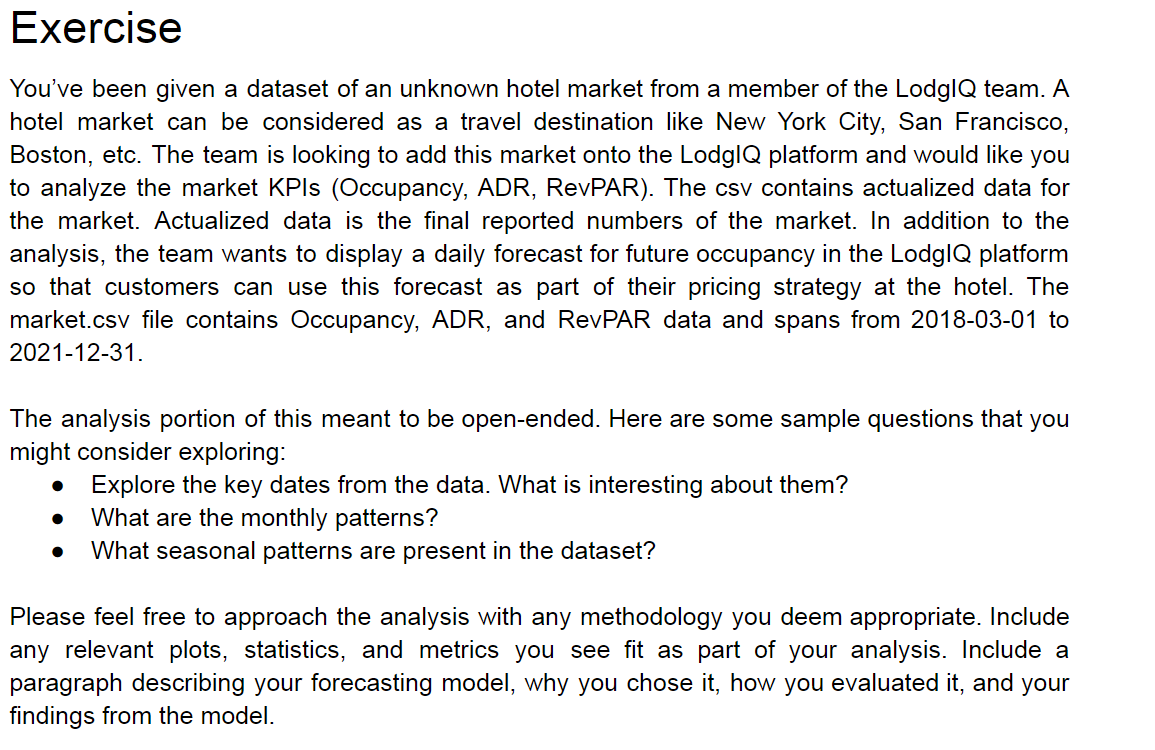

## Milestone 1: Understand the Dataset
#### Objective: Load the dataset, understand its structure, and explore the key features (stay_date, occ, adr, revpar).
#### Deliverables: Summary statistics, data types, missing values, and initial observations.


In [91]:
#imports
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import dtale

In [33]:
df_data = pd.read_csv('market.csv')

In [34]:
df_data

,stay_date,occ,adr,revpar
0,3/1/18,0.874524,215.932333,188.838079
1,3/2/18,0.899531,197.135094,177.329213
2,3/3/18,0.838585,201.118114,168.654686
3,3/4/18,0.762481,212.537298,162.055643
4,3/5/18,0.831692,253.831953,211.110073
...,...,...,...,...
1396,12/27/21,0.604845,325.360273,196.792469
1397,12/28/21,0.554664,332.491924,184.421176
1398,12/29/21,0.530664,339.950188,180.399286
1399,12/30/21,0.596610,362.866735,216.489797


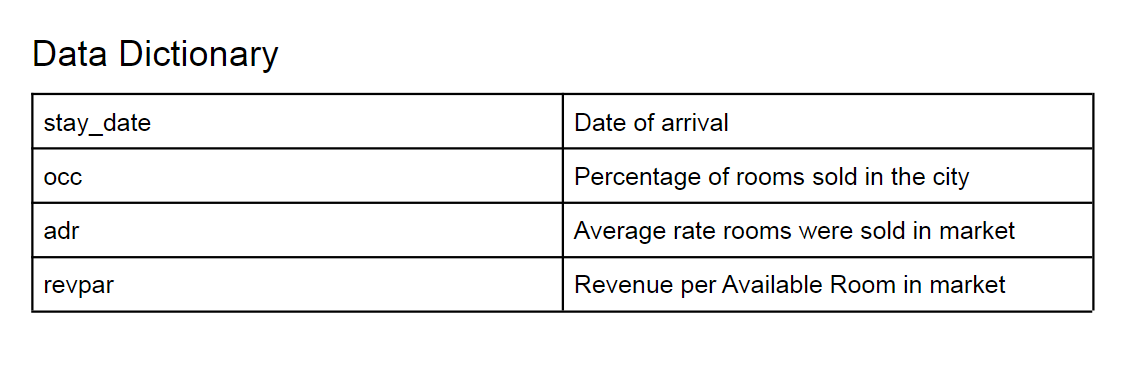

In [35]:
df_data.describe()   #no missing values # 

,occ,adr,revpar
count,1401.000000,1401.000000,1401.000000
mean,0.590814,228.738633,158.678388
std,0.344515,84.568521,118.913296
min,0.022706,103.380565,2.712649
25%,0.202607,140.459131,25.532530
50%,0.731095,229.762673,162.055643
75%,0.920651,289.312420,253.709687
max,1.045192,527.157875,544.524998


In [36]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   stay_date  1401 non-null   object 
 1   occ        1401 non-null   float64
 2   adr        1401 non-null   float64
 3   revpar     1401 non-null   float64
dtypes: float64(3), object(1)
memory usage: 43.9+ KB


## Milestone 2: Data Cleaning and Preprocessing
#### Objective: Handle missing data, correct any data type issues, and ensure the dataset is ready for analysis.
#### Deliverables: Cleaned dataset and a brief report on the cleaning steps taken.


In [37]:
# convert stay_date to datetime
df_data['stay_date'] = pd.to_datetime(df_data['stay_date'], format='%m/%d/%y')

In [38]:
#feature engineering
# add the day of the week in a seperate column
df_data['day_of_week'] = df_data['stay_date'].dt.day_name()

In [39]:
# add day of the month in a seperate column
df_data['day_of_month'] = df_data['stay_date'].dt.day
# add month in a seperate column
df_data['month'] = df_data['stay_date'].dt.month
# add year in a seperate column
df_data['year'] = df_data['stay_date'].dt.year

In [40]:
# add seperate columns that contains  occ, adr, revpar converted into categorical using 5 bins
df_data['occ_cat'] = pd.cut(df_data['occ'], 5, labels=False)
df_data['adr_cat'] = pd.cut(df_data['adr'], 5, labels=False)
df_data['revpar_cat'] = pd.cut(df_data['revpar'], 5, labels=False)


In [41]:
df_data

,stay_date,occ,adr,revpar,day_of_week,day_of_month,month,year,occ_cat,adr_cat,revpar_cat
0,2018-03-01,0.874524,215.932333,188.838079,Thursday,1,3,2018,4,1,1
1,2018-03-02,0.899531,197.135094,177.329213,Friday,2,3,2018,4,1,1
2,2018-03-03,0.838585,201.118114,168.654686,Saturday,3,3,2018,3,1,1
3,2018-03-04,0.762481,212.537298,162.055643,Sunday,4,3,2018,3,1,1
4,2018-03-05,0.831692,253.831953,211.110073,Monday,5,3,2018,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1396,2021-12-27,0.604845,325.360273,196.792469,Monday,27,12,2021,2,2,1
1397,2021-12-28,0.554664,332.491924,184.421176,Tuesday,28,12,2021,2,2,1
1398,2021-12-29,0.530664,339.950188,180.399286,Wednesday,29,12,2021,2,2,1
1399,2021-12-30,0.596610,362.866735,216.489797,Thursday,30,12,2021,2,3,1


In [42]:
# assuming monday to be first day of the week
# convert day_of_week to 1,2,3,4,5,6,7
df_data["day_of_week"] = df_data["day_of_week"].map({"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7})

In [44]:
# add a seperate columns that contains rolling average of occ, adr and revpar over 2 days
df_data['rolling_avg_occ'] = df_data['occ'].rolling(window=2).mean()
df_data['rolling_avg_adr'] = df_data['adr'].rolling(window=2).mean()
df_data['rolling_avg_revpar'] = df_data['revpar'].rolling(window=2).mean()

## Milestone 3: Exploratory Data Analysis (EDA)
#### Objective: Perform EDA to uncover patterns, trends, and insights. Focus on understanding the distribution of KPIs over time.
#### Deliverables: Visualizations (e.g., time series plots), statistical summaries, and key findings.



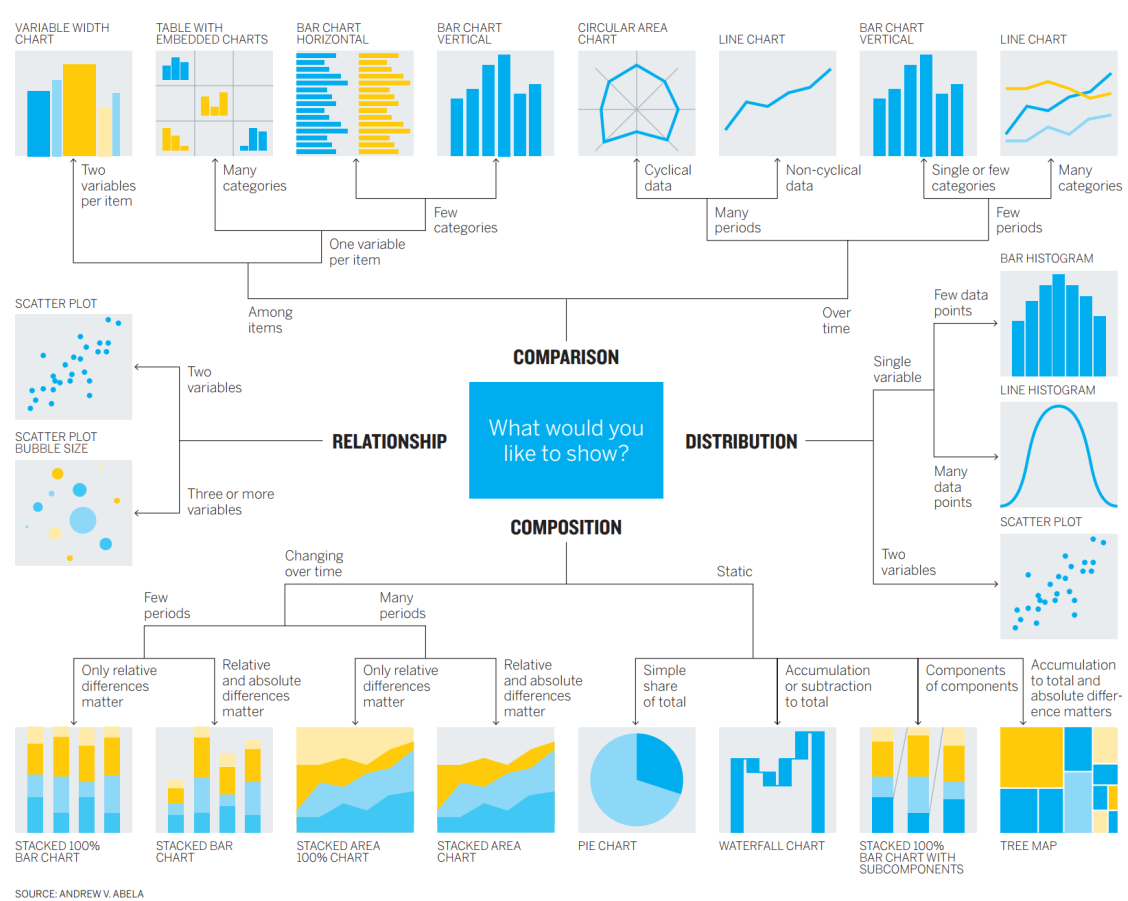

#### revpar


' There are some days when the revenue is unexpectedly low. Which are those days, why it happens, how to handle it needs to be figured out.'

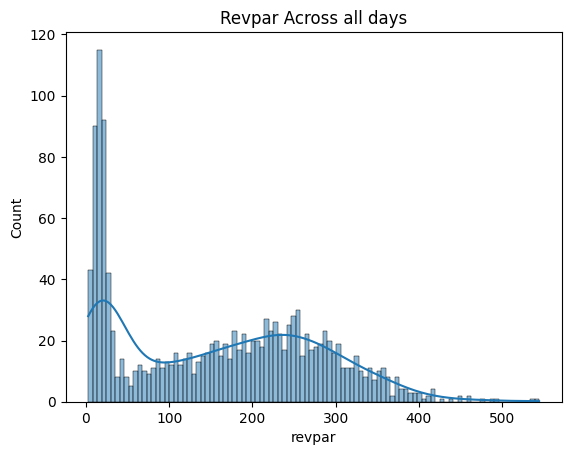

In [54]:
sns.histplot(data=df_data, x="revpar", bins=100, kde=True)
plt.title("Revpar Across all days")

Text(0.5, 1.0, 'Revpar across all dates')

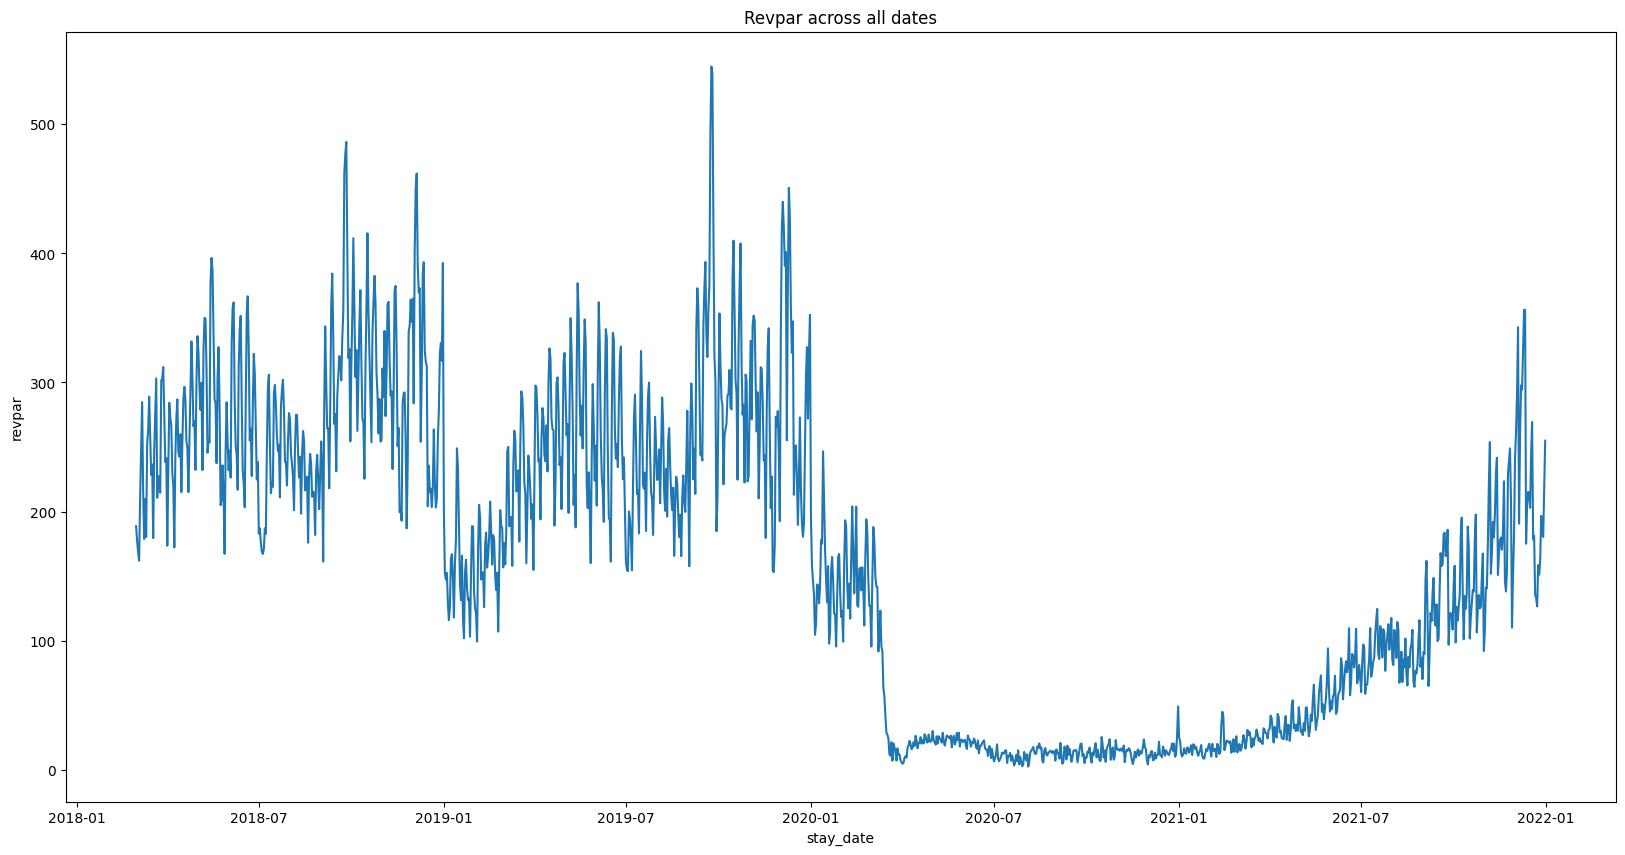

In [64]:
sns.lineplot(data=df_data, x="stay_date", y="revpar")  # sudden drop in revenue due to covid-19 lockdown
plt.title("Revpar across all dates")

### occ

' There are some days when the revenue is unexpectedly low. Which are those days, why it happens, how to handle it needs to be figured out.'

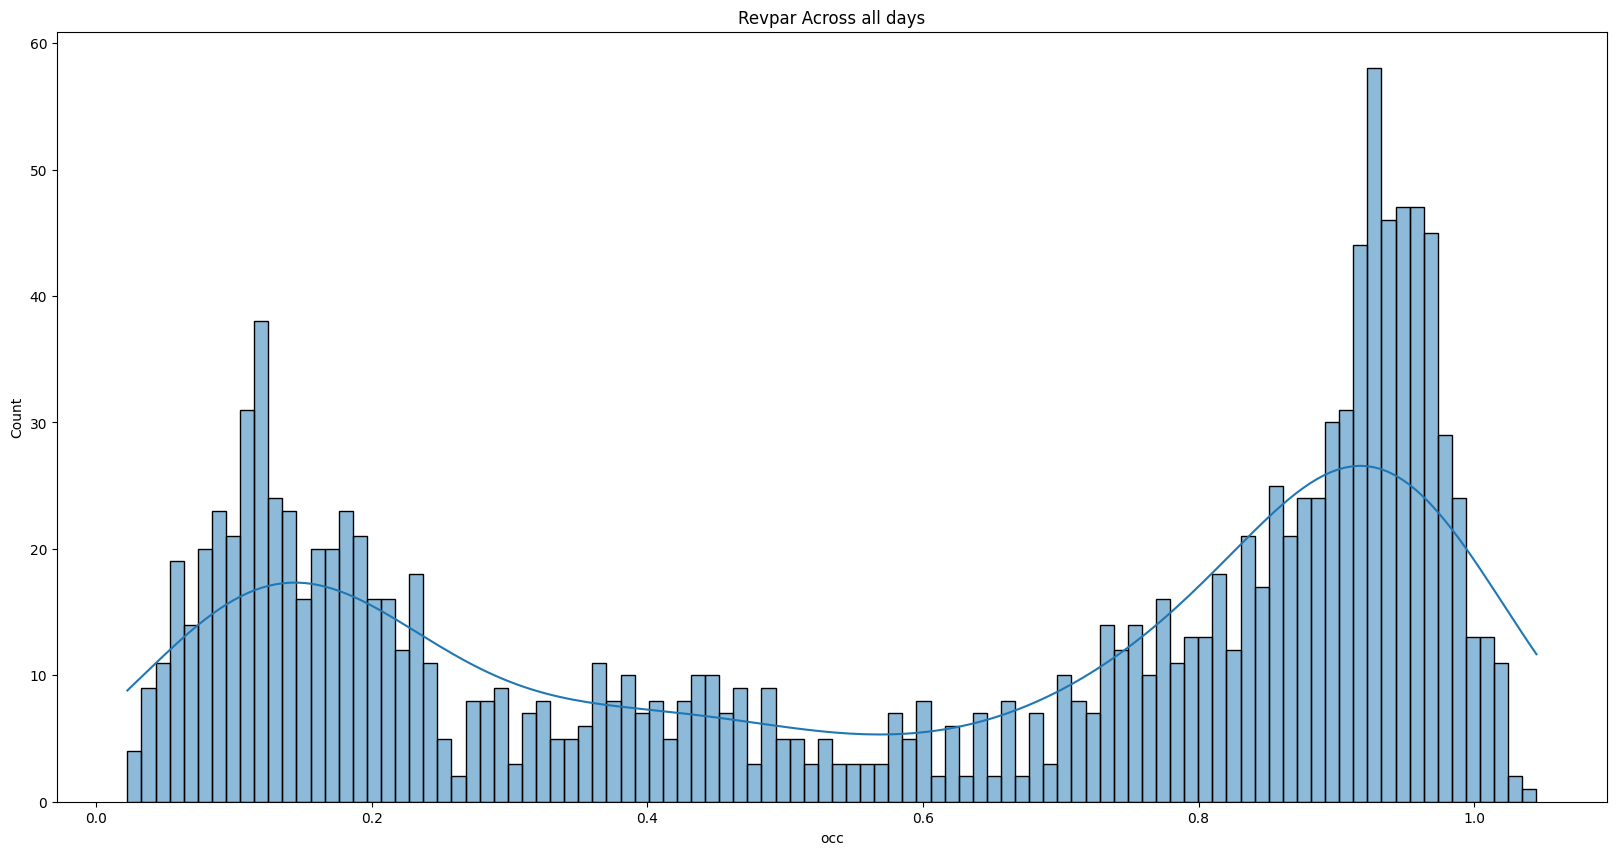

In [83]:
sns.histplot(data=df_data, x="occ", bins=100, kde=True)
plt.title("Revpar Across all days")

Text(0.5, 1.0, 'Revpar across all dates')

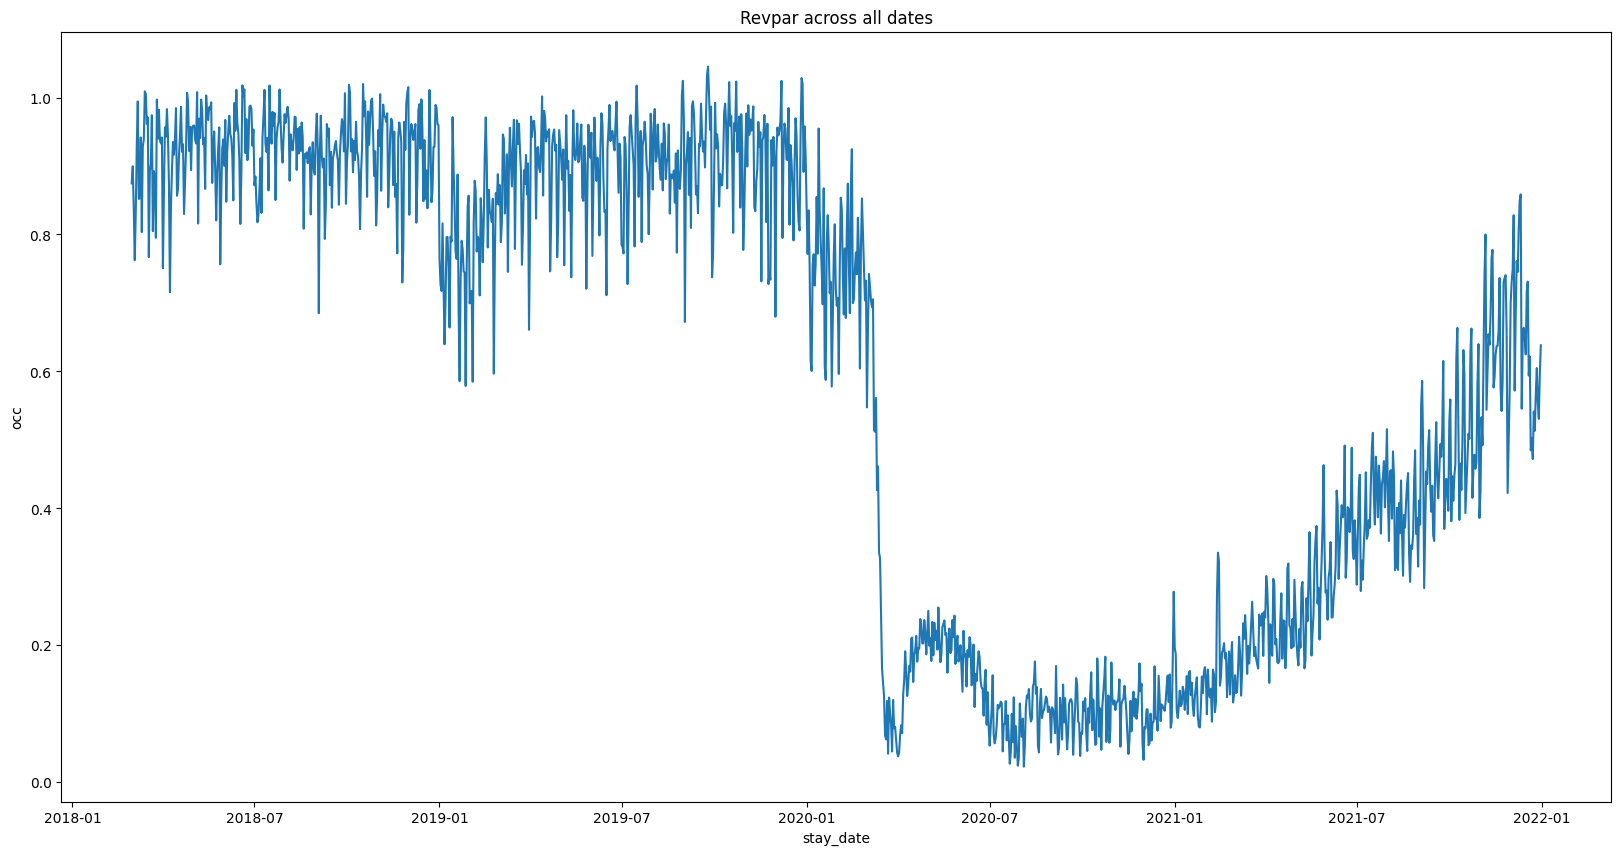

In [85]:
sns.lineplot(data=df_data, x="stay_date", y="occ")  # sudden drop in revenue due to covid-19 lockdown
plt.title("Revpar across all dates")

Text(0.5, 1.0, 'Revpar Across all days')

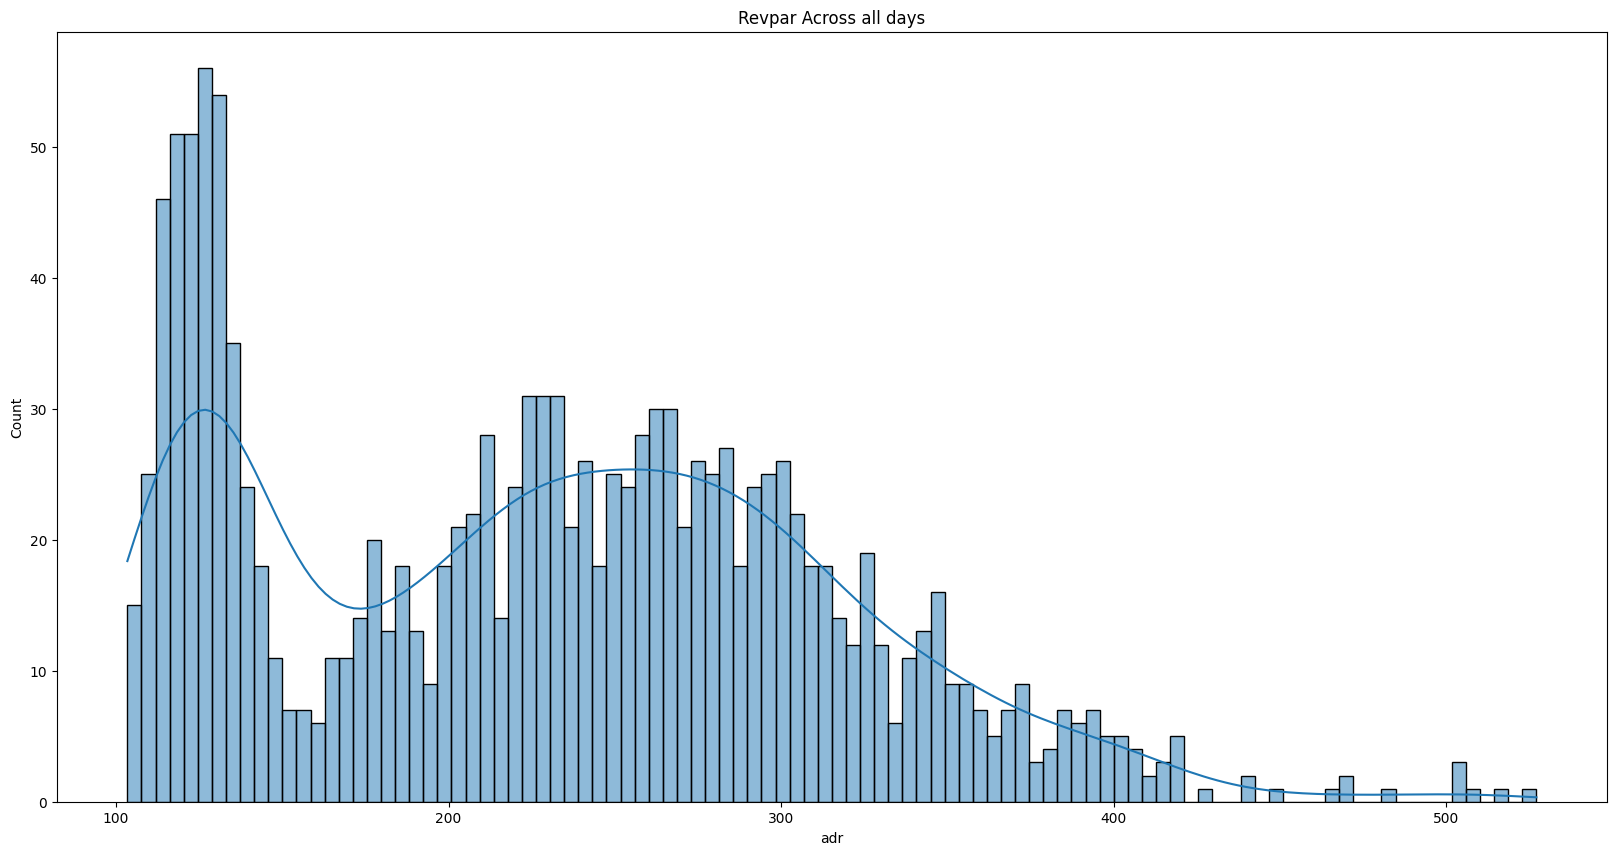

In [86]:
sns.histplot(data=df_data, x="adr", bins=100, kde=True)
plt.title("Revpar Across all days")

Text(0.5, 1.0, 'Revpar across all dates')

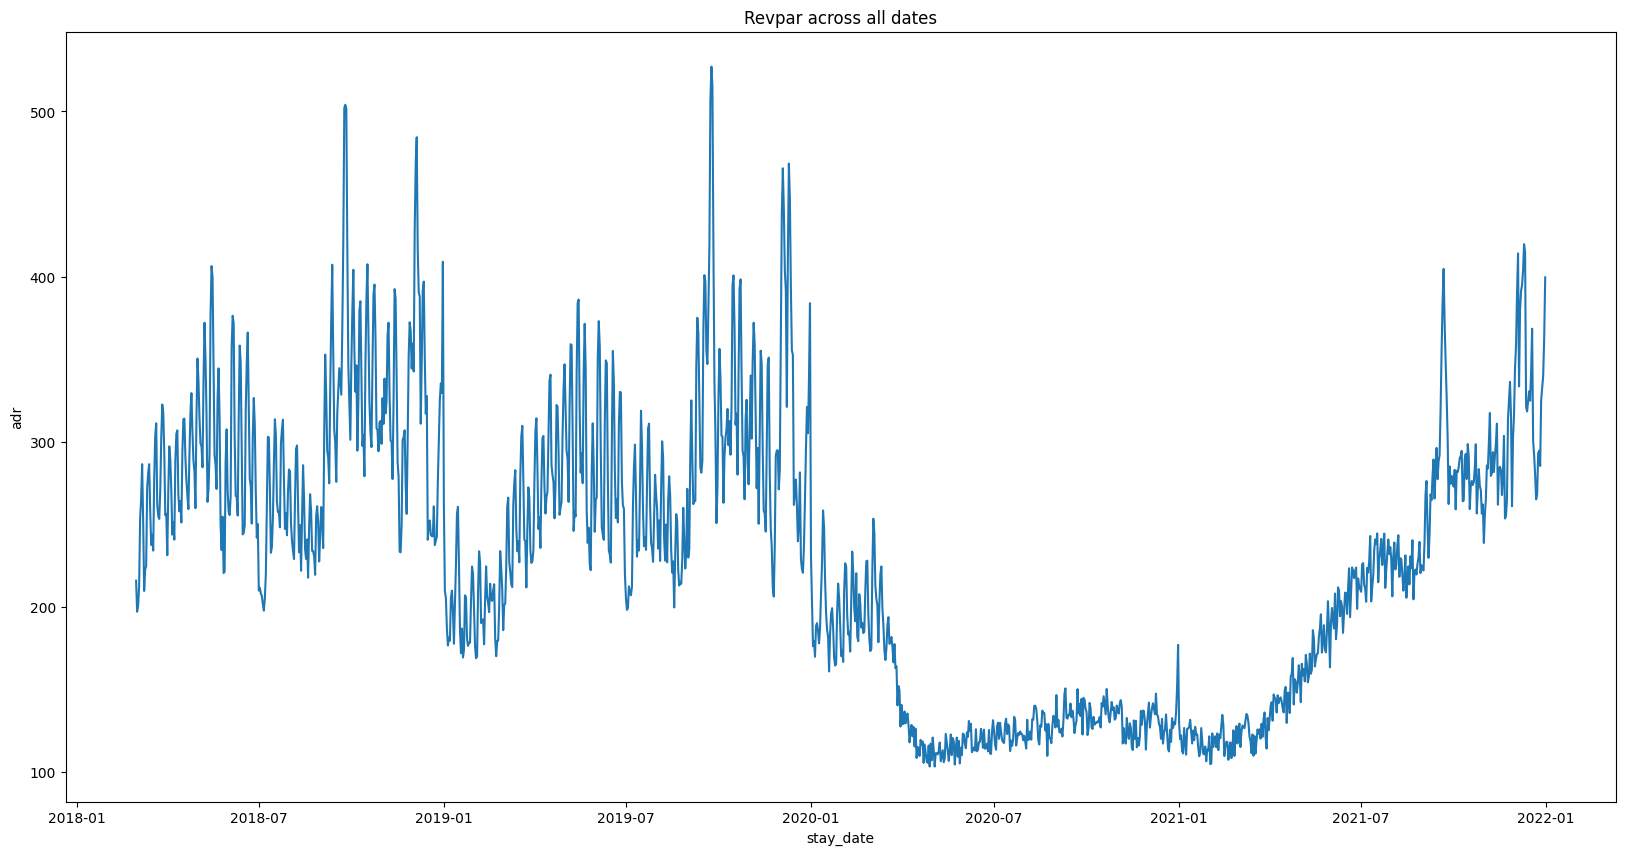

In [87]:
sns.lineplot(data=df_data, x="stay_date", y="adr")  # sudden drop in revenue due to covid-19 lockdown
plt.title("Revpar across all dates")

## Milestone 4: Key Dates and Events Analysis
#### Objective: Identify and analyze key dates that show significant changes or patterns in occupancy, ADR, and RevPAR.
#### Deliverables: List of key dates, visualizations highlighting these dates, and insights.

In [ ]:
#significant changes date:
#max rise
#max drop
#positive outlier
#negative outlier


In [88]:
d = {"a":2,"b":3}


Milestone 5: Monthly Patterns Analysis
Objective: Analyze monthly trends to understand how KPIs vary across different months.
Deliverables: Monthly trend plots, seasonality analysis, and insights.
Milestone 6: Seasonal Patterns Analysis
Objective: Explore seasonal patterns in the dataset, considering factors like holidays, weather, or events.
Deliverables: Seasonal decomposition plots and interpretations.
Milestone 7: Forecasting Model Selection
Objective: Research and select an appropriate forecasting model for predicting future occupancy rates (e.g., ARIMA, SARIMA, LSTM).
Deliverables: Justification for model selection and a plan for implementation.
Milestone 8: Model Implementation
Objective: Implement the selected forecasting model using the historical data.
Deliverables: Code for the model, along with any preprocessing steps required for modeling.
Milestone 9: Model Evaluation
Objective: Evaluate the forecasting model's performance using appropriate metrics (e.g., MAE, RMSE).
Deliverables: Model evaluation report, performance metrics, and potential model refinements.
Milestone 10: Final Report and Presentation
Objective: Compile a comprehensive report that includes your analysis, findings, forecasting model, and insights.
Deliverables: Final report with visualizations, model description, conclusions, and potential next steps.